In [1]:
%reset -f
import pickle
import numpy as np
from matplotlib import pyplot as plt 
import array
import seaborn as sns
import pandas as pd
import os
from os.path import join, dirname, abspath
from matplotlib.transforms import Affine2D
import sklearn
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

In [6]:

pip list

Package                            Version
---------------------------------- --------------------
affine                             2.4.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 

Note: you may need to restart the kernel to use updated packages.


In [66]:

datafiles=["Tsc1_Classical80PCAtotal.xlsx","Tsc1_LMT80PCAtotal.xlsx","Tsc1_Moseq80PCAtotal.xlsx", 
"Tsc1_Classical_LMT80PCAtotal.xlsx","Tsc1_Classical_Moseq80PCAtotal.xlsx","Tsc1_LMT_Moseq80PCAtotal.xlsx",
         "Tsc1_All80PCAtotal.xlsx"]
datafolder="/mnt/Data1/Arun/Machine_learning/PCA80_Tsc1/"
datanames=["Classical","LMT", "Moseq", "Classical+LMT","Classical+Moseq","LMT+Moseq","Tsc1"]
#datafiles=[,"Tsc180PCAtotal.xlsx"]
#datanames=["noise","Data"]
save_graphs_to="./Graphs_Tsc1_80" #where you will save your generated heatmaps
if not os.path.exists(save_graphs_to):
    os.makedirs(save_graphs_to)
    print("declared directory not found, creating directory")

In [67]:
data=[]
for i in range(len(datafiles)):
    datafile=datafolder+datafiles[i]
    frame_np=pd.read_excel(datafile)
    frame2=frame_np.to_numpy()
    excelframe=pd.DataFrame(frame2)
    data.append(excelframe)
print(data)

[              0        1         2        3         4         5        6  \
0   T1 Wt std F  -2.4034  0.805434  19.2356  -3.60588   13.0494  6.48192   
1   T1 Wt std F  6.54249  -7.12443 -4.22321  -4.96393  -1.58657  7.10297   
2   T1 Wt std F -3.64231  -4.65325  18.7512    10.825   6.84185  10.3514   
3   T1 Wt std F -9.64623  0.454303   13.297   16.4439 -0.772387 -5.90919   
4   T1 Wt std F -1.90757   7.25401  17.0145  -10.4654  -11.9457   1.6826   
..          ...      ...       ...      ...       ...       ...      ...   
95  T1 Mut EE M -20.8191   6.98602  7.92961   10.8681   12.1022  3.55588   
96  T1 Mut EE M -16.0882   11.3928 -8.82986   2.07313  -11.3104 -14.0802   
97  T1 Mut EE M -13.6826  -13.0635  4.50702   6.14898  -6.84709  2.40409   
98  T1 Mut EE M -24.2876  -8.16434  1.42306   8.06279  -2.57341 -6.70083   
99  T1 Mut EE M -16.7543  -3.59589  12.1075 -0.055733   9.03058  5.21857   

           7  
0    2.96819  
1    10.8991  
2    6.20321  
3    -1.1666  
4    6.8312

In [68]:
N=1
clflist=[]
numgroupslist=[]
traininglist=[]
groupindexlist=[]
kfoldlist=[]
acclist=[]
encoderlist=[]

for j in range(len(datafiles)):
    tdat=data[j]
    le=LabelEncoder()
    tdat[0]=le.fit_transform(tdat[0])
    training = tdat.iloc[:, 1:].values
    numgroups = tdat[0].values
    acc=0  
    for i in range(N):
        clf=OneVsRestClassifier(LinearSVC(C=0.1,dual=False)).fit(training, numgroups)
        newacc=accuracy_score(numgroups, clf.predict(training[:]))
        if newacc>acc:
            bestclf=clf
            acc=newacc
            print(acc)
        kfold=[]
        kf = KFold(n_splits=np.size(training,0))
        kf.get_n_splits(training)
        for i, (train_index, test_index) in enumerate(kf.split(training)):
            clf2=OneVsRestClassifier(LinearSVC(C=0.1,dual=False)).fit(training[train_index], numgroups[train_index])
            kfold.append(accuracy_score(numgroups[test_index], clf.predict(training[test_index])))
        kfold=np.mean(kfold)
    kfoldlist.append(kfold)
    clflist.append(clf)
    numgroupslist.append(numgroups)
    traininglist.append(training)
    acclist.append(acc)
    encoderlist.append(le)

0.57
0.67
0.74
0.78
0.79
0.85
0.89


In [69]:
clf=OneVsRestClassifier(LinearSVC(C=0.1,dual=False)).fit(training, numgroups)
clf.predict(training[:])

array([2, 6, 6, 2, 2, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7,
       4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 3, 7, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 1, 1, 1, 1, 1, 1, 1])

[0.57, 0.67, 0.74, 0.78, 0.79, 0.85, 0.89]
[0.57, 0.67, 0.74, 0.78, 0.79, 0.85, 0.89]
[0.57, 0.67, 0.74, 0.78, 0.79, 0.85, 0.89, 0.57, 0.67, 0.74, 0.78, 0.79, 0.85, 0.89]


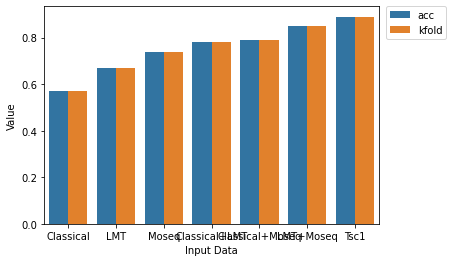

In [70]:
testingye=[]
Datalength=np.size(datanames)
yeet=datanames+datanames
skeet=(["acc"]*Datalength)+(["kfold"]*Datalength)
print(acclist)
print(kfoldlist)
testingye=acclist+kfoldlist
print(testingye)
bigdata=np.array([testingye,skeet,yeet])
df3 = pd.DataFrame(bigdata.T, columns=['Value', 'Type',"Input Data"])
df3["Value"]=df3["Value"].astype("float64")
sns.barplot(data=df3,x="Input Data",y='Value',hue='Type')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(join(save_graphs_to, "Cross-Validation.svg"), format = 'svg', dpi=960)
Crossvalidation_data = pd.DataFrame([datanames, acclist,kfoldlist])
Crossvalidation_data.to_excel(join(save_graphs_to, 'Crossvalidation_data.xlsx'), index=False)


In [71]:
df3

,Value,Type,Input Data
0,0.57,acc,Classical
1,0.67,acc,LMT
2,0.74,acc,Moseq
3,0.78,acc,Classical+LMT
4,0.79,acc,Classical+Moseq
5,0.85,acc,LMT+Moseq
6,0.89,acc,Tsc1
7,0.57,kfold,Classical
8,0.67,kfold,LMT
9,0.74,kfold,Moseq


In [72]:
max(numgroups)

7

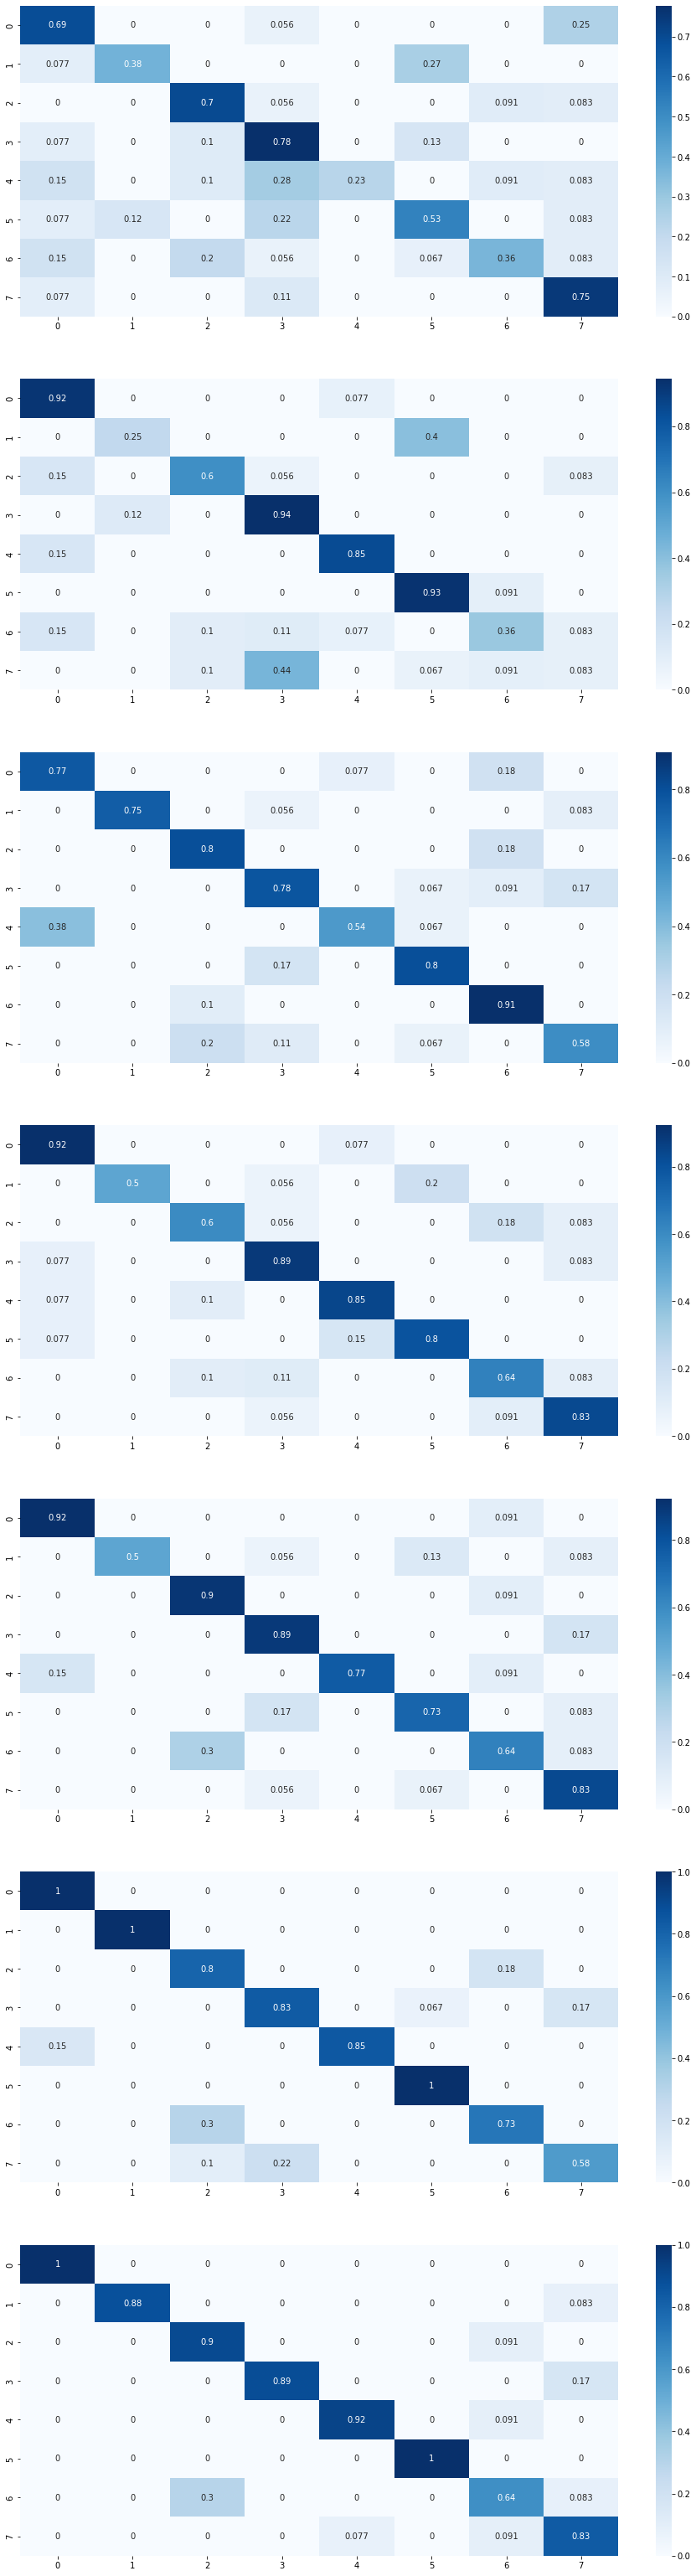

In [73]:
fig3,axs3=plt.subplots(len(datafiles),figsize=(16, 8*len(datafiles)))

for i in range(len(datafiles)):
    clf=clflist[i]
    training=traininglist[i]
    numgroups=numgroupslist[i]
    predictions=clf.predict(training[:])
    classratmat=confusion_matrix(numgroups, predictions)
    classratmat=classratmat/np.sum(classratmat,1)
    plt.figure(fig3)
    sns.heatmap(classratmat, cmap="Blues",annot=True, ax=axs3[i])
fig3.savefig(join(save_graphs_to, "Confusion matrix.svg"), format = 'svg', dpi=960)

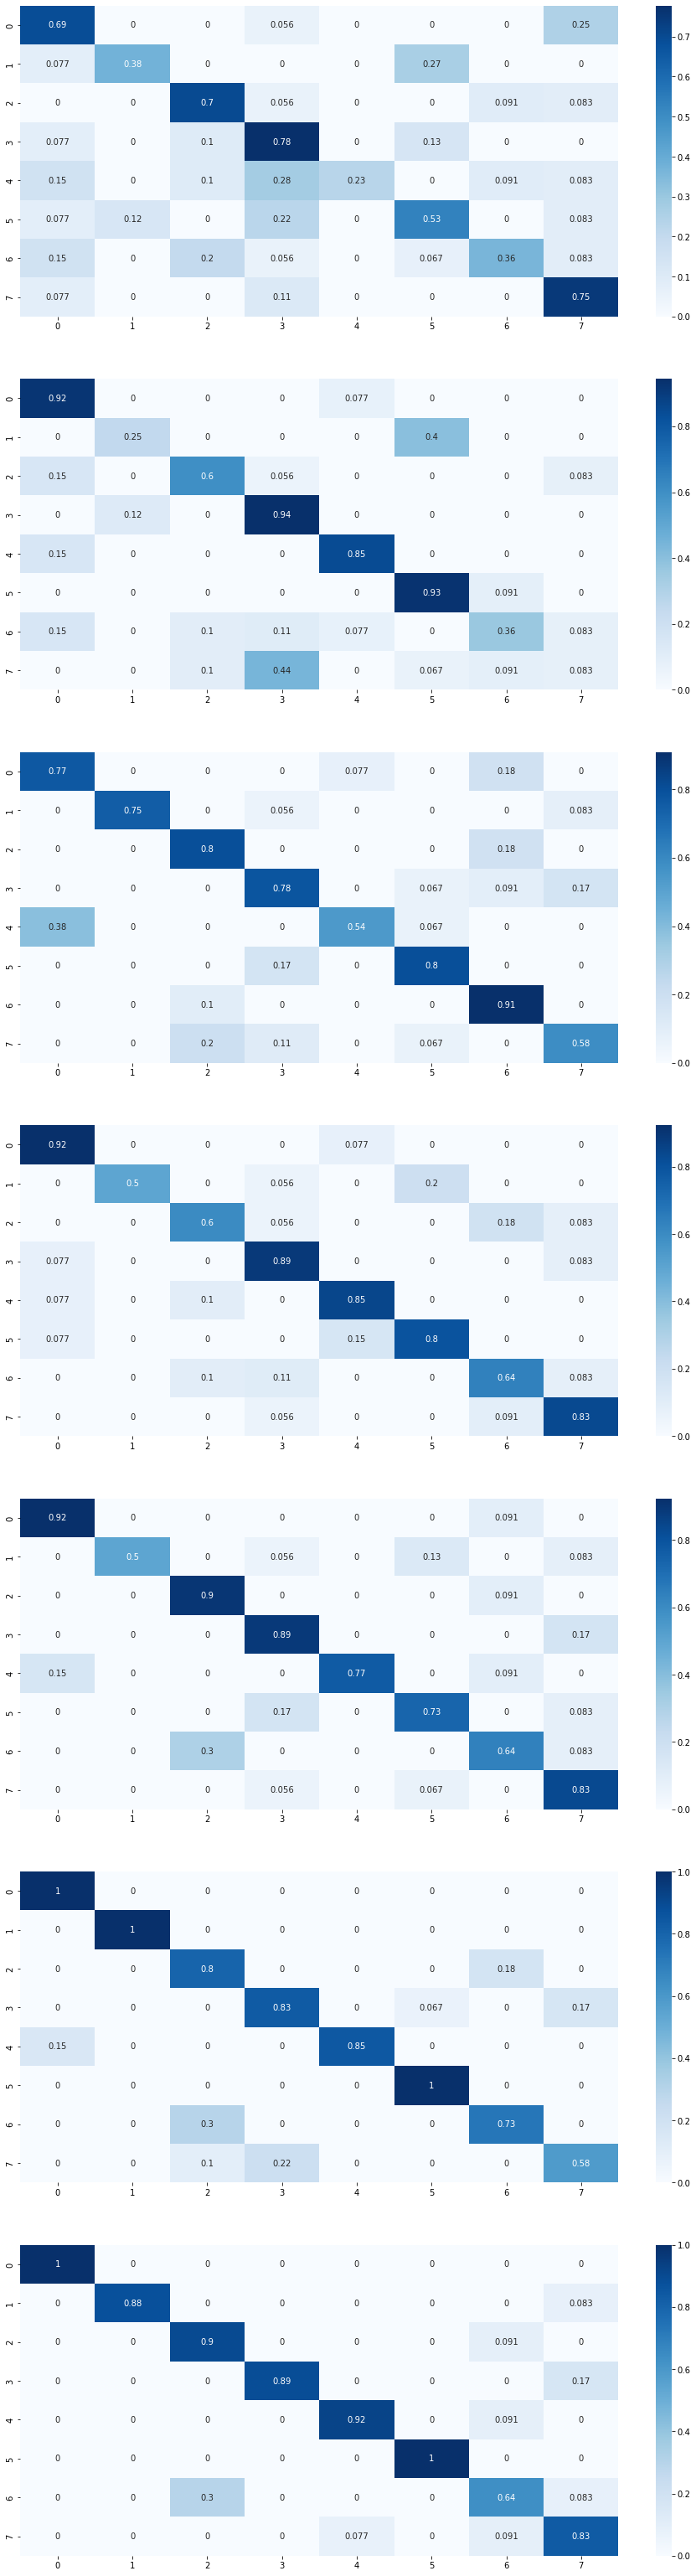

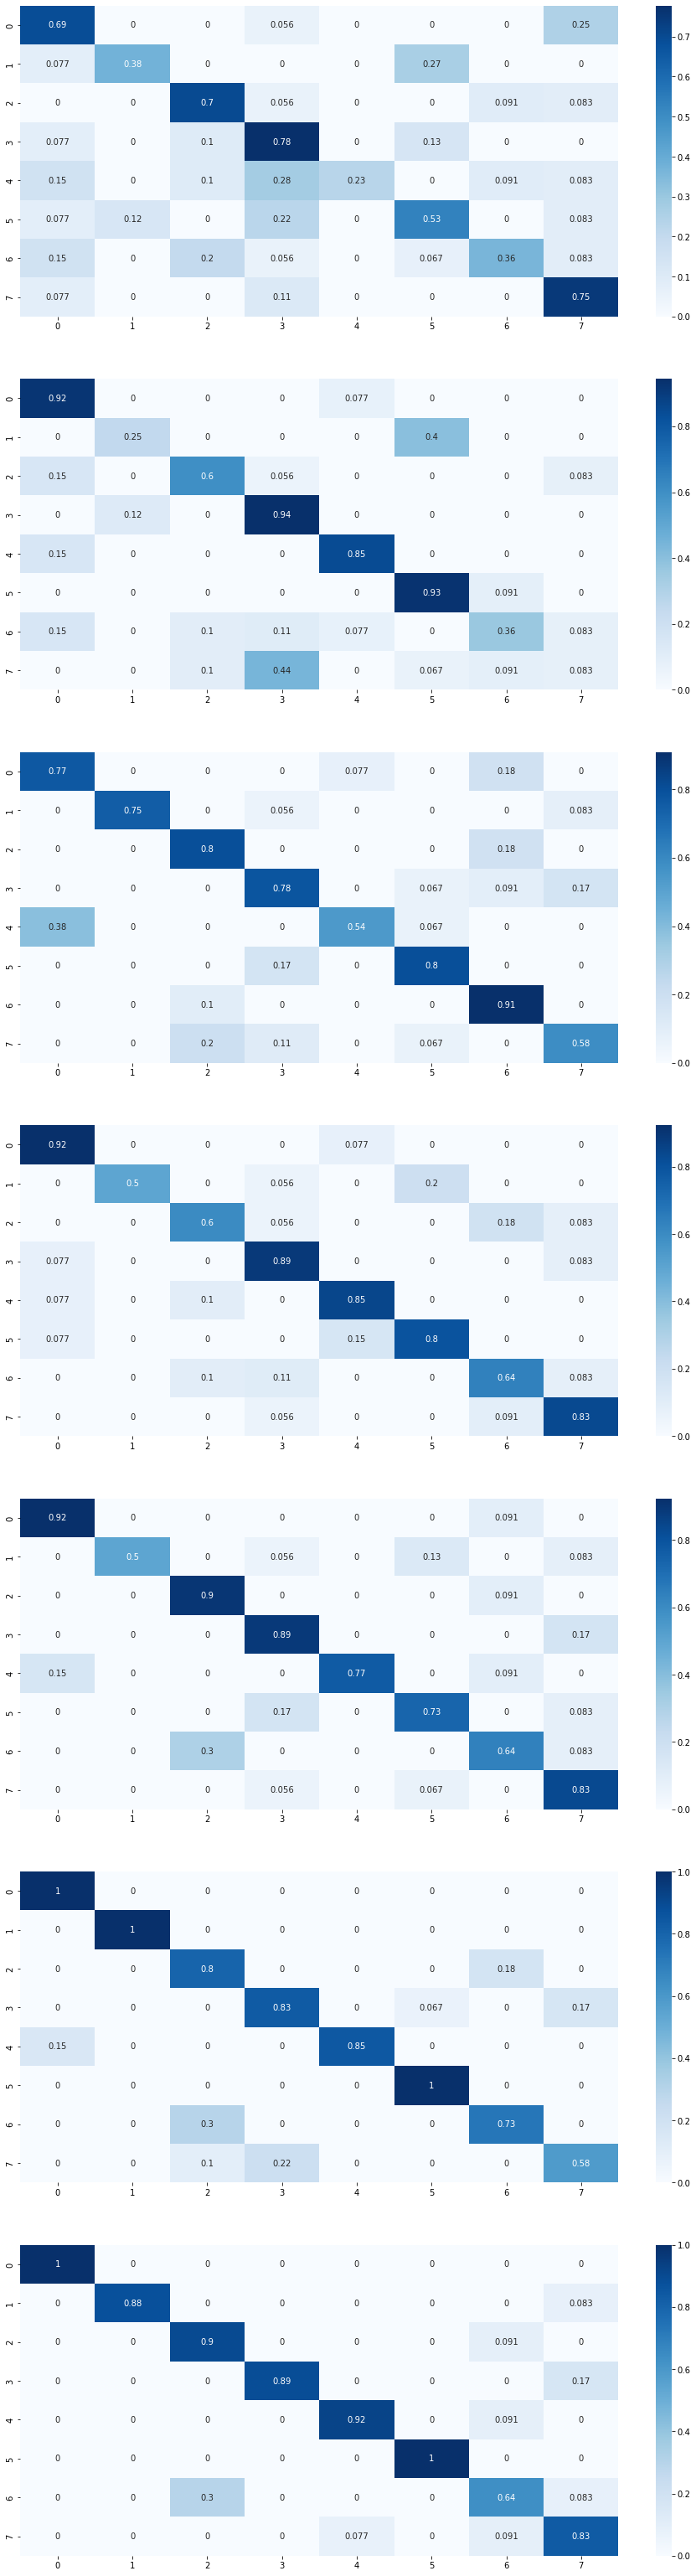

In [74]:
plt.figure(fig3)

In [60]:
print(np.shape(numgroups))
print(np.shape(training))
print(le.inverse_transform(list(range(max(numgroups)+1))))


(327,)
(327, 17)
['L7T1 Mut EE F' 'L7T1 Mut EE M' 'L7T1 Mut std F' 'L7T1 Mut std M'
 'L7T1 Wt EE F' 'L7T1 Wt EE M' 'L7T1 Wt std F' 'L7T1 Wt std M'
 'S2 Mut EE F' 'S2 Mut EE M' 'S2 Mut std F' 'S2 Mut std M' 'S2 Wt EE F'
 'S2 Wt EE M' 'S2 Wt std F' 'S2 Wt std M' 'T1 Mut EE F' 'T1 Mut EE M'
 'T1 Mut std F' 'T1 Mut std M' 'T1 Wt EE F' 'T1 Wt EE M' 'T1 Wt std F'
 'T1 Wt std M']


In [31]:
predictions


array([2, 6, 6, 2, 2, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7,
       4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 3, 7, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 1, 1, 1, 1, 1, 1, 1])

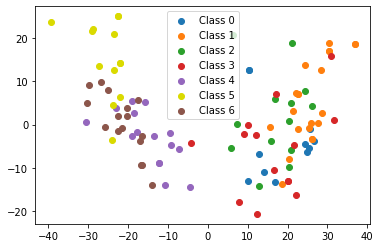

In [18]:
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#DADA00', '#8C564B']
training=traininglist[0]
for i, color in enumerate(colors):
    plt.scatter(training[numgroups==i,0], training[numgroups==i,1], marker='o', color=color, label=f'Class {i}')
plt.legend()
plt.show()

In [70]:
np.shape(training[1,:])

(18,)

In [40]:
test=data[2]

In [44]:
np.sort(np.unique(test["S2 Wt std F"]))

array(['L7T1 Mut EE F', 'L7T1 Mut std F', 'L7T1 Mut std M',
       'L7T1 Wt std F', 'L7T1 Wt std M', 'S2 Mut EE F', 'S2 Mut EE M',
       'S2 Mut std F', 'S2 Mut std M', 'S2 Wt EE F', 'S2 Wt EE M',
       'S2 Wt std F', 'S2 Wt std M', 'T1 Mut EE F', 'T1 Mut EE M',
       'T1 Mut std F', 'T1 Mut std M', 'T1 Wt EE F', 'T1 Wt EE M',
       'T1 Wt std F', 'T1 Wt std M'], dtype=object)

In [47]:
np.split(classratmat, 2, 2)

IndexError: tuple index out of range

In [50]:
classratmat[:,0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05882353, 0.05882353, 0.        ,
       0.05882353, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [54]:
temp=classratmat[1:,1:]

<AxesSubplot:>

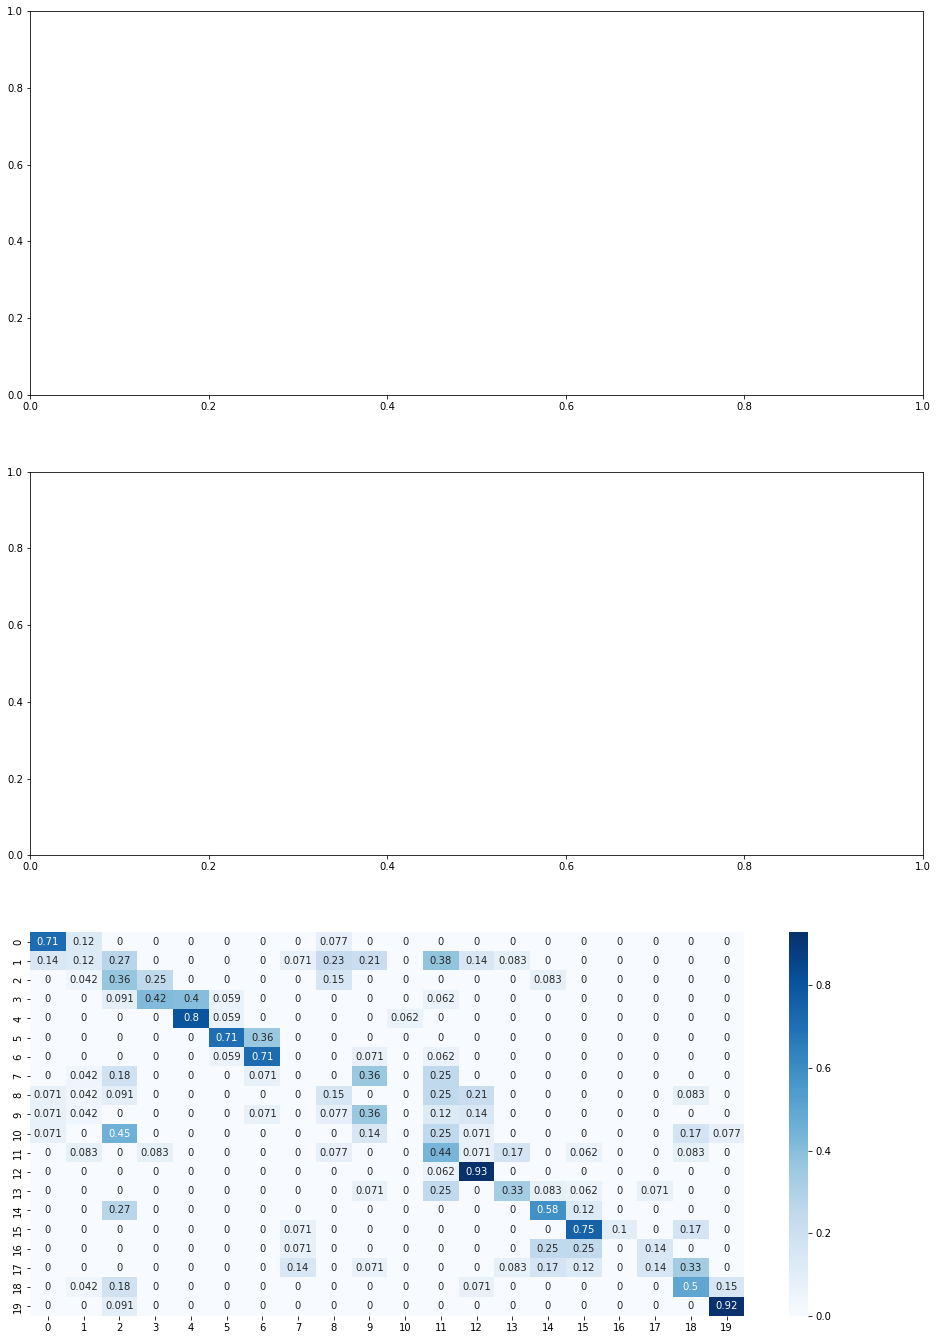

In [59]:

fig3,axs3=plt.subplots(len(datafiles),figsize=(16, 24))
temp
plt.figure(fig3)
sns.heatmap(temp, cmap="Blues",annot=True, ax=axs3[i])

<AxesSubplot:>

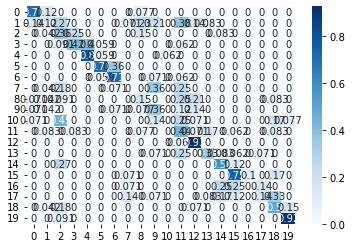

In [55]:
sns.heatmap(temp, cmap="Blues",annot=True)

In [65]:
region=[2,2,4,4,4,4]
np.mean(temp[:2,:2])
labels=np.sort(np.unique(test["S2 Wt std F"]))
labels=labels[1:]
print(labels)

['L7T1 Mut std F' 'L7T1 Mut std M' 'L7T1 Wt std F' 'L7T1 Wt std M'
 'S2 Mut EE F' 'S2 Mut EE M' 'S2 Mut std F' 'S2 Mut std M' 'S2 Wt EE F'
 'S2 Wt EE M' 'S2 Wt std F' 'S2 Wt std M' 'T1 Mut EE F' 'T1 Mut EE M'
 'T1 Mut std F' 'T1 Mut std M' 'T1 Wt EE F' 'T1 Wt EE M' 'T1 Wt std F'
 'T1 Wt std M']


<BarContainer object of 20 artists>

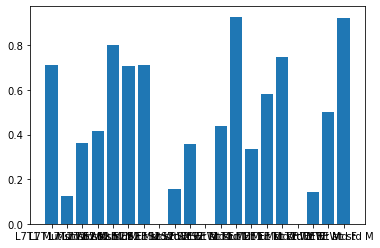

In [68]:
plt.bar(labels,np.diagonal(temp))

In [95]:
groups

array(['L7T1 Mut std F', 'L7T1 Mut std M', 'L7T1 Wt std F',
       'L7T1 Wt std M', 'T1 Mut EE F', 'T1 Mut EE M', 'T1 Mut std F',
       'T1 Mut std M', 'T1 Wt EE F', 'T1 Wt EE M', 'T1 Wt std F',
       'T1 Wt std M'], dtype=object)

In [96]:
numgroups

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11.])